In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
DataSetsPath     = env('DataSetsPath') #*
ModelsPath       = env('ModelsPath') #*
FitFunctionsPath = env('FitFunctionsPath') #*

In [2]:
import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)

In [3]:
import torch
import torchvision.transforms as transforms
from DataSets.dataSetCatsVsDogs import DataSet_Img_To_Label

In [4]:
device      = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:

resize_image = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((250, 250)),
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data   = "C:/Users/malekir1/Downloads/dogs-vs-cats/train/train"
test = False
myDataSet     = DataSet_Img_To_Label(root_Data, resize_image, test = test)
myDataSetTest = DataSet_Img_To_Label(root_Data, resize_image, test = True)
print("myDataSet     = ", myDataSet)
print("myDataSetTest = ", myDataSetTest)

images.size() =  25000
images.size() =  10
myDataSet     =  len(dataSet) =  25000
dataSet[0]   =  ('cat.0.jpg', 1)

myDataSetTest =  len(dataSet) =  10
dataSet[0]   =  ('cat.0.jpg', 1)



In [6]:
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler

random_sampler = RandomSampler(myDataSet)
batch_size = 16
my_Data_Loader      = DataLoader(myDataSet    , batch_size = batch_size, num_workers = 0, sampler = random_sampler)
my_Data_Loader_test = DataLoader(myDataSetTest, batch_size = 4, num_workers = 0, sampler = random_sampler)

In [7]:
from Models.modelCatsVsDogs import modelCNN
# from DataSets.dataSetCatsVsDogs import DataSet_Img_To_Label

myModel = modelCNN()
myModel.cuda()

modelCNN(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat_1): Flatten(start_dim=1, end_dim=-1)
  (dens_1): Sequential(
    (0): Linear(in_features=107648, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [10]:

#* test train_modelCNN
from FitFunctions.fitFunctionsForCatsVsDogs import train_modelCNN
import torch.nn as nn
from torch import optim

opt_model = optim.Adam(myModel.parameters(),  lr = 3e-2, betas = (0.9, 0.999))
# criterion = nn.BCELoss()
# criterion = torch.nn.MSELoss()
criterion = nn.CrossEntropyLoss()
history = train_modelCNN(my_Data_Loader, myModel, opt_model, device = device, num_epochs = 5, get_History = True)
# history = train_model(myModel, my_Data_Loader, criterion, opt_model, device = device, num_epochs = 1)


epoch =  0


C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch completed, Average Loss: 175557469.2180
epoch =  1
Epoch completed, Average Loss: 0.6172
epoch =  2
Epoch completed, Average Loss: 0.6049
epoch =  3
Epoch completed, Average Loss: 0.5795
epoch =  4
Epoch completed, Average Loss: 0.5336


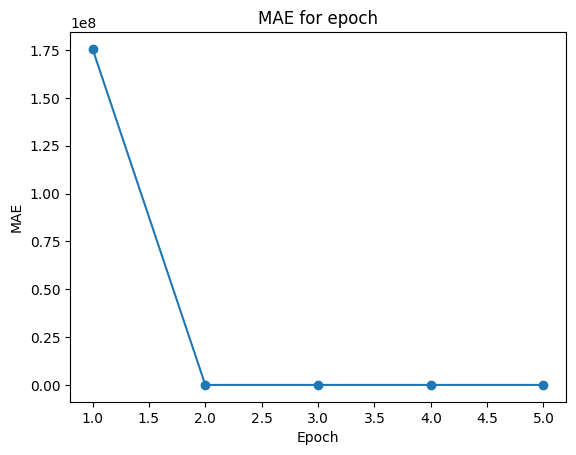

In [11]:
import matplotlib.pyplot as plt

history['MAE'] = history['MAE']
x_values = range(1, len(history['MAE']) + 1)

#* Plot the history['MAE']
plt.plot(x_values, history['MAE'], marker='o')

#* Add labels and title
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE for epoch')

#* Show the plot
plt.show()